# Classification Project: Bank Personal Loan Campaign Targeting

## Problem Statement

### Context

This Project is about a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

My goal is to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',200)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import(
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)
pd.set_option('display.float_format',lambda x: '%3f'%x)

## Loading the dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Bootcamp/Loan_Modelling.csv')

## Data Overview

* Observations
* Sanity checks

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.600000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.500000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.000000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.700000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.000000,2,0,0,0,0,0,1


In [ ]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')

There are 5000 rows and 14 columns


In [ ]:
data=df.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,5000.000000,2500.500000,1443.520003,1.000000,1250.750000,2500.500000,3750.250000,5000.000000
Age,5000.000000,45.338400,11.463166,23.000000,35.000000,45.000000,55.000000,67.000000
Experience,5000.000000,20.104600,11.467954,-3.000000,10.000000,20.000000,30.000000,43.000000
Income,5000.000000,73.774200,46.033729,8.000000,39.000000,64.000000,98.000000,224.000000
ZIPCode,5000.000000,93169.257000,1759.455086,90005.000000,91911.000000,93437.000000,94608.000000,96651.000000
Family,5000.000000,2.396400,1.147663,1.000000,1.000000,2.000000,3.000000,4.000000
CCAvg,5000.000000,1.937938,1.747659,0.000000,0.700000,1.500000,2.500000,10.000000
Education,5000.000000,1.881000,0.839869,1.000000,1.000000,2.000000,3.000000,3.000000
Mortgage,5000.000000,56.498800,101.713802,0.000000,0.000000,0.000000,101.000000,635.000000
Personal_Loan,5000.000000,0.096000,0.294621,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
for column in data:
  print(data[column].value_counts())
  print('-'*50)

1       1
3331    1
3338    1
3337    1
3336    1
       ..
1667    1
1666    1
1665    1
1664    1
5000    1
Name: ID, Length: 5000, dtype: int64
--------------------------------------------------
35    151
43    149
52    145
54    143
58    143
50    138
41    136
30    136
56    135
34    134
39    133
57    132
59    132
51    129
45    127
60    127
46    127
42    126
31    125
40    125
55    125
29    123
62    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
67     12
23     12
Name: Age, dtype: int64
--------------------------------------------------
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 15    119
 8     119
 1

In [ ]:
data['CreditCard'].value_counts(normalize=True)
#normalize=True: present in percentage

0   0.706000
1   0.294000
Name: CreditCard, dtype: float64

In [ ]:
data['Online'].value_counts(normalize=True)
#normalize=True: present in percentage

1   0.596800
0   0.403200
Name: Online, dtype: float64

In [ ]:
data['CD_Account'].value_counts(normalize=True)

0   0.939600
1   0.060400
Name: CD_Account, dtype: float64

In [ ]:
data['Securities_Account'].value_counts(normalize=True)

0   0.895600
1   0.104400
Name: Securities_Account, dtype: float64

In [ ]:
data['Personal_Loan'].value_counts(normalize=True)

0   0.904000
1   0.096000
Name: Personal_Loan, dtype: float64

In [ ]:
data['Education'].value_counts(normalize=True)

1   0.419200
3   0.300200
2   0.280600
Name: Education, dtype: float64

In [ ]:
numeric_cols=data.select_dtypes(include=[np.number]).columns
print('Numeric columns:', numeric_cols)

Numeric columns: Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


In [ ]:
#observation on numerical data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.000000,2500.500000,1443.520003,1.000000,1250.750000,2500.500000,3750.250000,5000.000000
Age,5000.000000,45.338400,11.463166,23.000000,35.000000,45.000000,55.000000,67.000000
Experience,5000.000000,20.104600,11.467954,-3.000000,10.000000,20.000000,30.000000,43.000000
Income,5000.000000,73.774200,46.033729,8.000000,39.000000,64.000000,98.000000,224.000000
ZIPCode,5000.000000,93169.257000,1759.455086,90005.000000,91911.000000,93437.000000,94608.000000,96651.000000
Family,5000.000000,2.396400,1.147663,1.000000,1.000000,2.000000,3.000000,4.000000
CCAvg,5000.000000,1.937938,1.747659,0.000000,0.700000,1.500000,2.500000,10.000000
Education,5000.000000,1.881000,0.839869,1.000000,1.000000,2.000000,3.000000,3.000000
Mortgage,5000.000000,56.498800,101.713802,0.000000,0.000000,0.000000,101.000000,635.000000
Personal_Loan,5000.000000,0.096000,0.294621,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
data['Education'].astype(float)

0      1.000000
1      1.000000
2      1.000000
3      2.000000
4      2.000000
         ...   
4995   3.000000
4996   1.000000
4997   3.000000
4998   2.000000
4999   1.000000
Name: Education, Length: 5000, dtype: float64

In [ ]:
data['Education'].value_counts(normalize=True)

1   0.419200
3   0.300200
2   0.280600
Name: Education, dtype: float64

In [ ]:
data['Education'].replace(1,'Undergraduate',inplace=True)
data['Education'].replace(2,'Graduate',inplace=True)
data['Education'].replace(3,'Professional',inplace=True)

In [ ]:
data[data['Experience']<0]['Experience'].unique()

array([-1, -2, -3])

In [ ]:
data['Experience'].replace(-1,1,inplace=True)
data['Experience'].replace(-2,2,inplace=True)
data['Experience'].replace(-3,3,inplace=True)

In [ ]:
data['ZIPCode'].nunique()

467

In [ ]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]

data["ZIPCode"] = data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [ ]:
cat_cols=[
    'Education',
    'Personal_Loan',
    'Securities_Account',
    'CD_Account',
    'Online',
    'CreditCard',
    'ZIPCode',
]
data[cat_cols]=data[cat_cols].astype('category')

## Exploratory Data Analysis.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [ ]:
def histogram_boxplot(data, feature, figsize=(12,7), kde=False, bins=None):
  f2,(ax_box2,ax_hist2)=plt.subplots(
      nrows=2,
      sharex=True,
      gridspec_kw={'height_ratios':(0.25,0.75)},
      figsize=figsize,
  )
  sns.boxplot(
      data=data,x=feature,ax=ax_box2, showmeans=True, color='violet'
  )
  sns.histplot(
      data=data,x=feature, kde=kde, ax=ax_hist2, bins=bins, palette='winter'
  ) if bins else sns.histplot(
      data=data, x=feature, kde=kde, ax=ax_hist2
  )
  ax_hist2.axvline(
      data[feature].mean(), color='green', linestyle='--'
  )
  ax_hist2.axvline(
      data[feature].median(), color='black', linestyle='--'
  )



In [ ]:
from matplotlib.widgets import EllipseSelector
def labeled_barplot(data,feature,perc=False,n=None):
  total=len(data[feature])
  count=data[feature].nunique()
  if n is None:
    plt.figure(figsize=(count+1, 5))
  else:
    plt.figure(figsize=(n+ 1, 5))

  plt.xticks(rotation=90, fontsize=15)
  ax=sns.countplot(
      data=data,
      x=feature,
      palette='Paired',
      order=data[feature].value_counts().index[:n].sort_values(),
  )

  for p in ax.patches:
      if perc==True:
          label='{:.1f}%'.format(
            100*p.get_height()/total
          )
      else:
        label=p.get_height()

      x= p.get_x()+ p.get_width()
      y= p.get_height()

      ax.annotate(
          label,
          (x,y),
          ha='center',
          va='center',
          size=12,
          xytext=(0,5),
          textcoords='offset points',
      )

      plt.show()



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   category
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   category
 10  Securities_Account  5000 non-null   category
 11  CD_Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 308.8 KB


**Age**

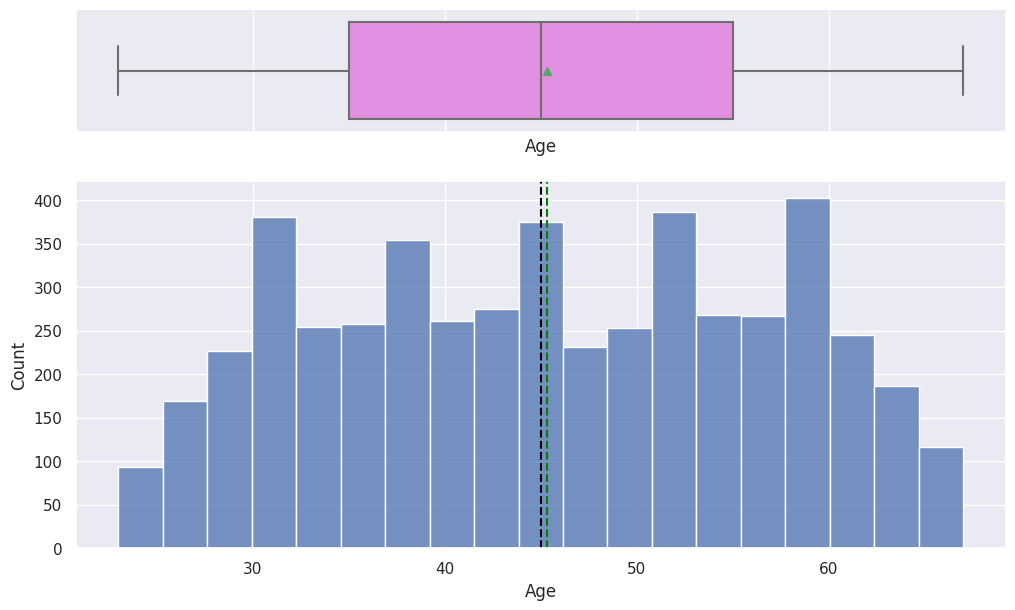

In [ ]:
histogram_boxplot(data,'Age')

**Experience**

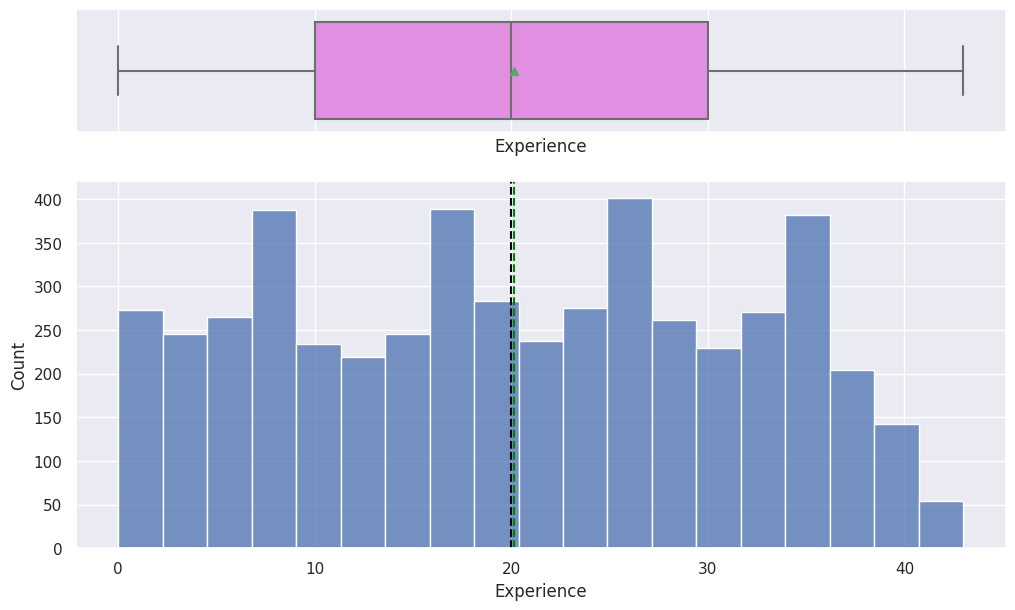

In [ ]:
histogram_boxplot(data,'Experience')

**Income**

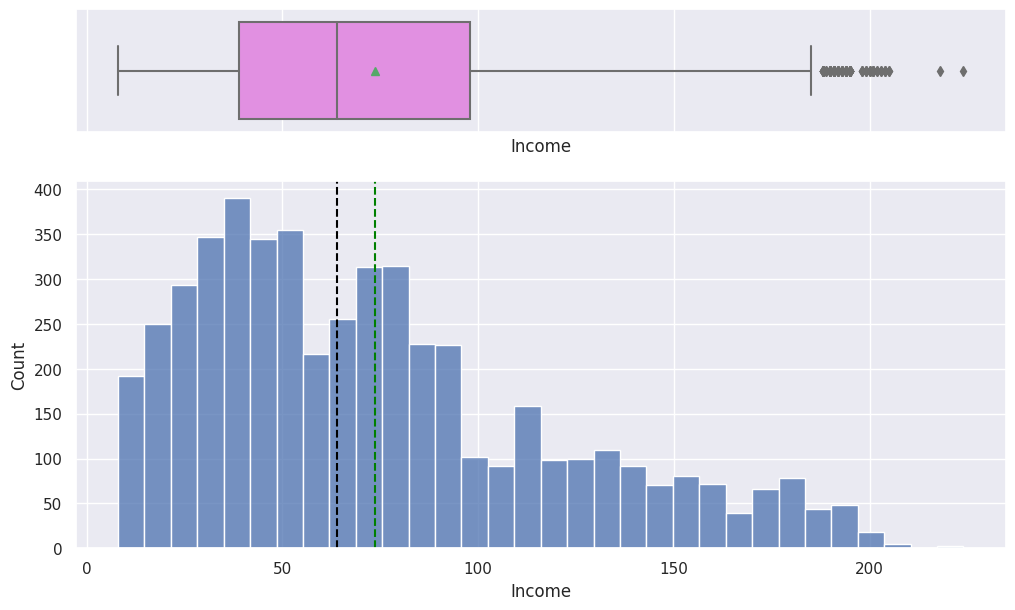

In [ ]:
histogram_boxplot(data,'Income')

**CCAvg**

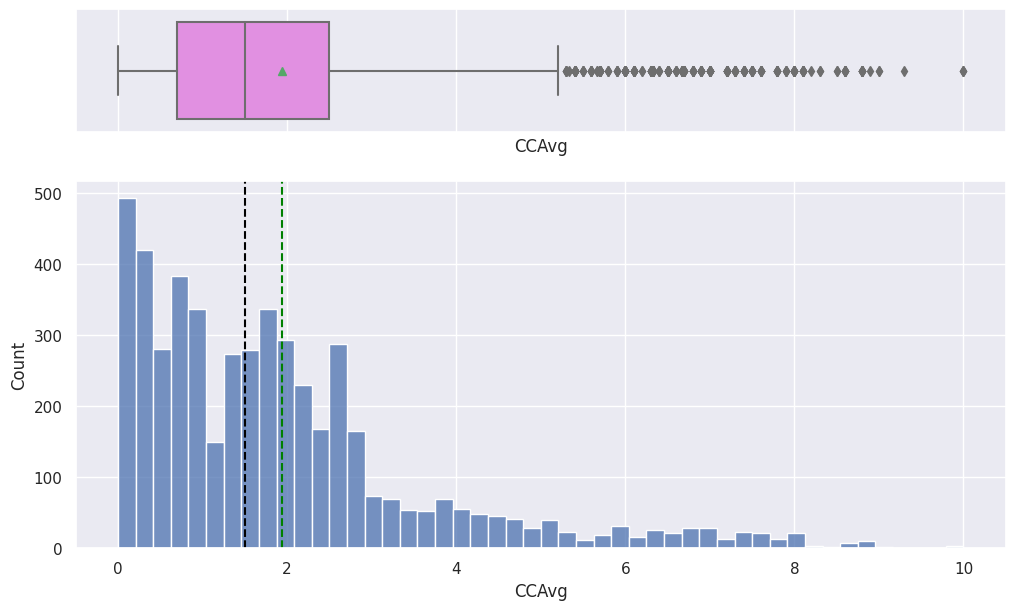

In [ ]:
histogram_boxplot(data,'CCAvg')

**Mortgage**

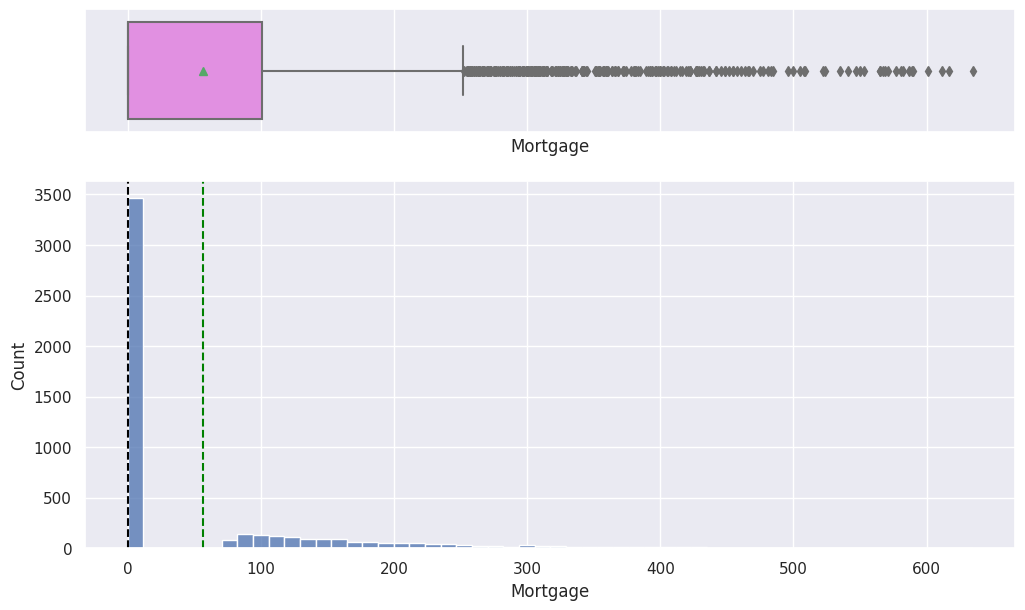

In [ ]:
histogram_boxplot(data,'Mortgage')

**Family**

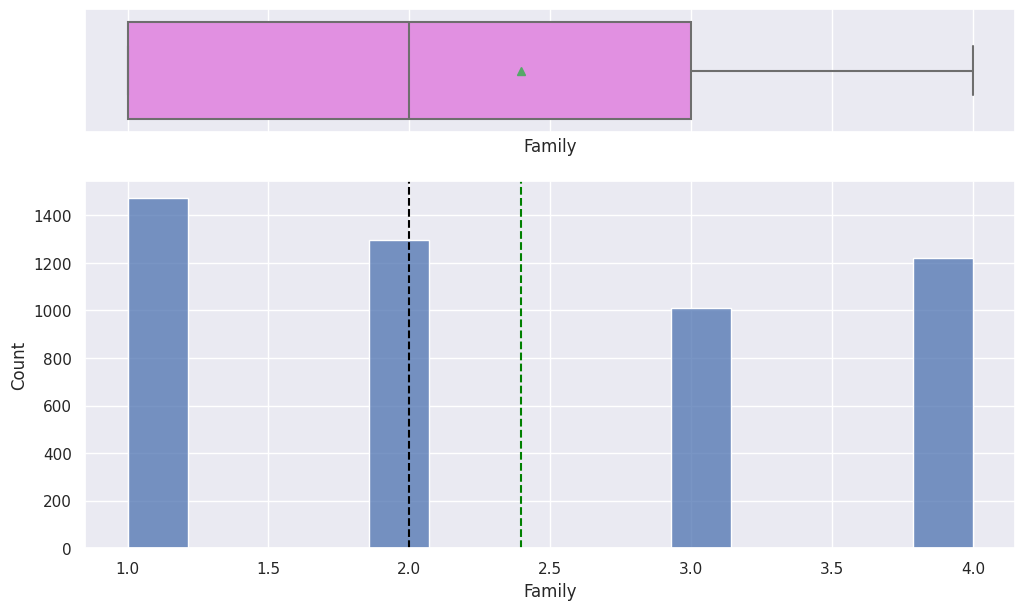

In [ ]:
histogram_boxplot(data,'Family')

**Credit Card**

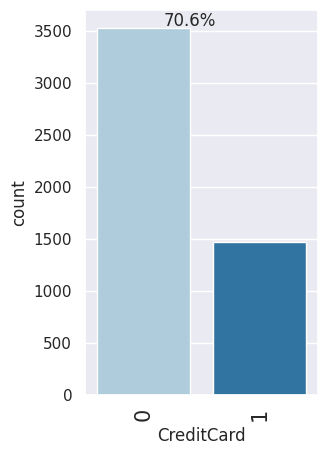

In [ ]:
labeled_barplot(data,'CreditCard',perc=True)

**Online**

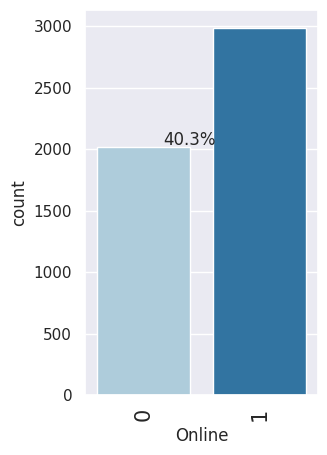

In [ ]:
labeled_barplot(data,'Online',perc=True)

**Personal Loan**

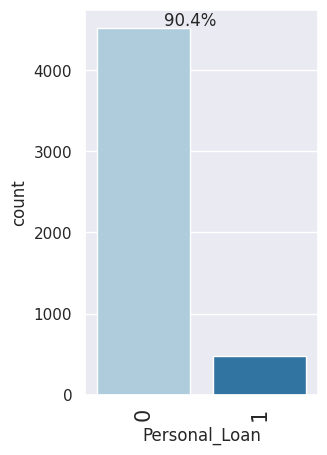

In [ ]:
labeled_barplot(data,'Personal_Loan',perc=True)

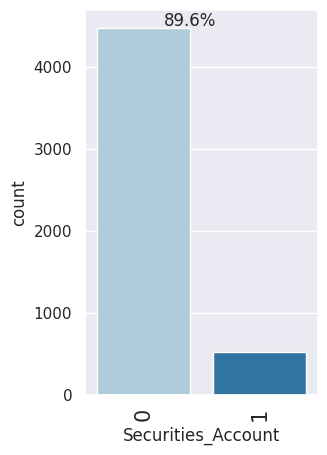

In [ ]:
labeled_barplot(data,'Securities_Account',perc=True)

**CD_Account**

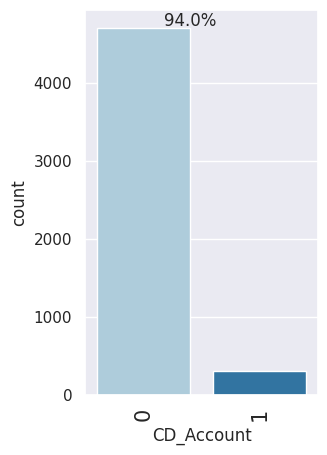

In [ ]:
labeled_barplot(data,'CD_Account',perc=True)

**Education**

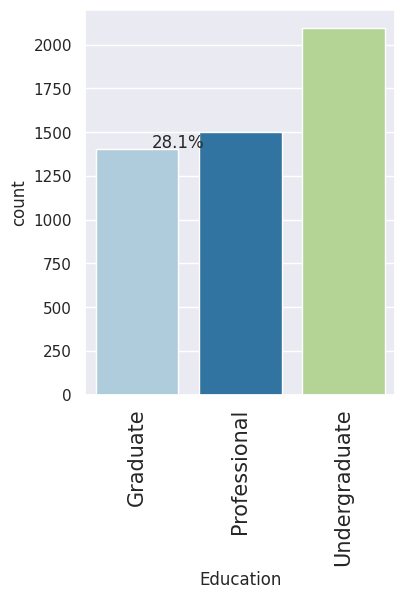

In [ ]:
labeled_barplot(data,'Education',perc=True)

**Bivariate analysis**

In [ ]:
def stacked_barplot(data,predictor,target):
  count= data[predictor].nunique()
  sorter= data[target].value_counts().index[-1]
  tabl=pd.crosstab(data[predictor],data[target],margins=True).sort_values(
      by=sorter,ascending=False
  )
  print(tabl)
  print('-'*120)
  tab=pd.crosstab(data[predictor],data[target], normalize='index').sort_values(
      by=sorter, ascending=False
  )
  tab.plot(kind='bar',stacked=True, figsize=(count+5,5))
  plt.legend(
      loc='lower left', frameon=False,
  )
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
  plt.show()

In [ ]:
def dustribution_plot_wrt_target(data, predictor, target):
  fig, axs = plt.subplots(2,2,figsize=(12,10))
  target_uniq=data[target].unique()
  axs[0,0].set_title('Distribution of target for target='+ str(target_uniq[0]))
  sns.histplot(
      data=data[data[target]== target_uniq[0]],
      x=predictor,
      kde=True,
      ax=axs[0,0],
      color='teal',
      stat='density',
  )

  axs[0,1].set_title('Distribution of target for target=' +str(target_unique[1]))
  sns.histplot(
      data=data[data[target]==target_uniq[1]],
      x=predictor,
      kde=True,
      ax=axs[0,1],
      color='orange',
      stat='density'
  )
  axs[1,0].set_title('Boxplot w.r.t target')
  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1,0], palette='gist_rainbow')

  axs[1,1].set_title('Boxplot (without outliers) w.r.t target')
  sns.boxplot(
      data=data,
      x=target,
      y=predictor,
      ax=axs[1,1],
      showfliers=False,
      palette='gist_rainbow'
  )
  plt.tight_layout()
  plt.show()

In [ ]:
num_columns=data.select_dtypes(exclude=np.object).columns #number: numerical variables
num_columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
corr=data[num_columns].corr()
corr

,ID,Age,Experience,Income,Family,CCAvg,Mortgage
ID,1.000000,-0.008473,-0.008202,-0.017695,-0.016797,-0.024675,-0.013920
Age,-0.008473,1.000000,0.993991,-0.055269,-0.046418,-0.052012,-0.012539
Experience,-0.008202,0.993991,1.000000,-0.046876,-0.051851,-0.049738,-0.011097
Income,-0.017695,-0.055269,-0.046876,1.000000,-0.157501,0.645984,0.206806
Family,-0.016797,-0.046418,-0.051851,-0.157501,1.000000,-0.109275,-0.020445
CCAvg,-0.024675,-0.052012,-0.049738,0.645984,-0.109275,1.000000,0.109905
Mortgage,-0.013920,-0.012539,-0.011097,0.206806,-0.020445,0.109905,1.000000


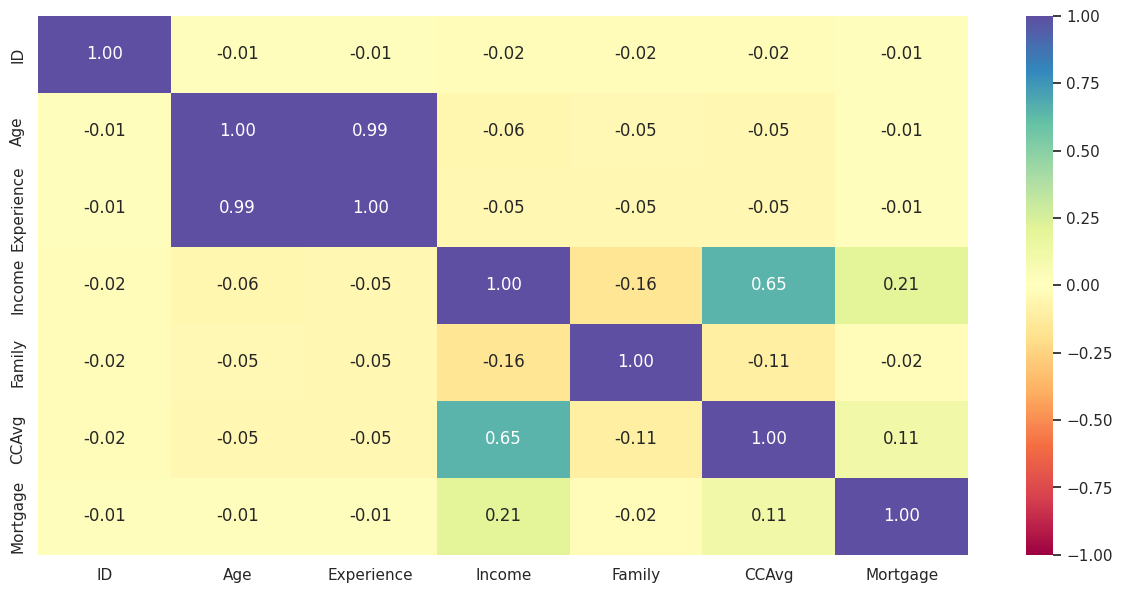

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='Spectral')
plt.show()

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
Professional   1296  205  1501
Graduate       1221  182  1403
Undergraduate  2003   93  2096
------------------------------------------------------------------------------------------------------------------------


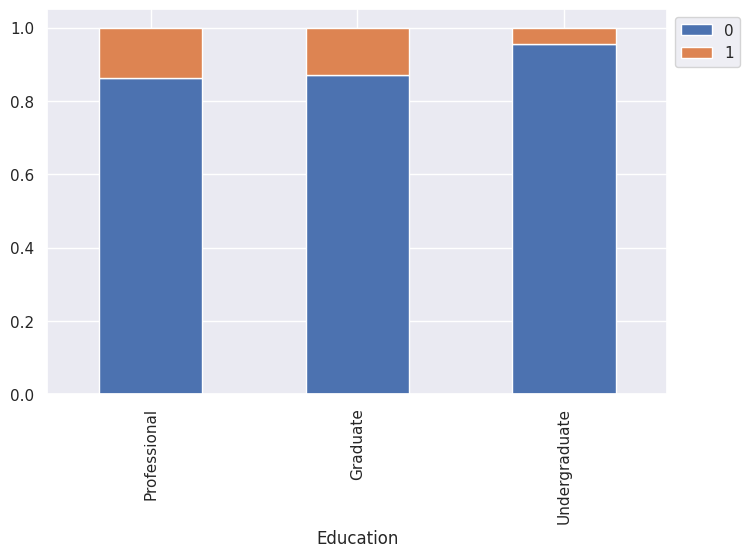

In [ ]:
stacked_barplot(data, 'Education', 'Personal_Loan')

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


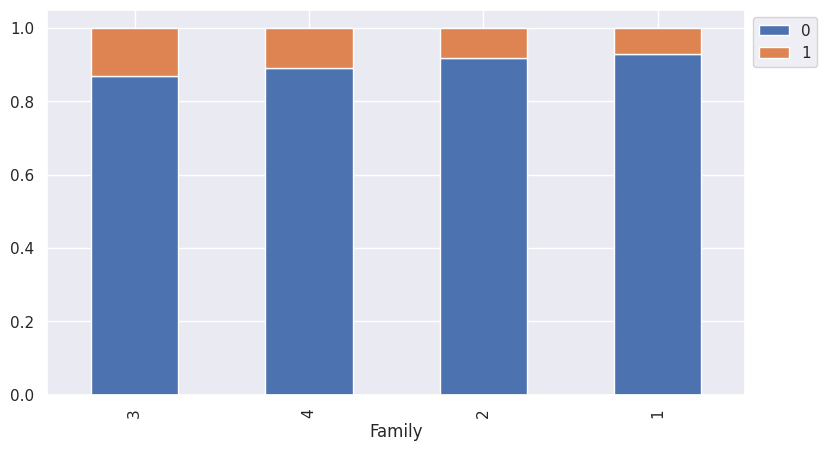

In [ ]:
stacked_barplot(data, 'Family', 'Personal_Loan')

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


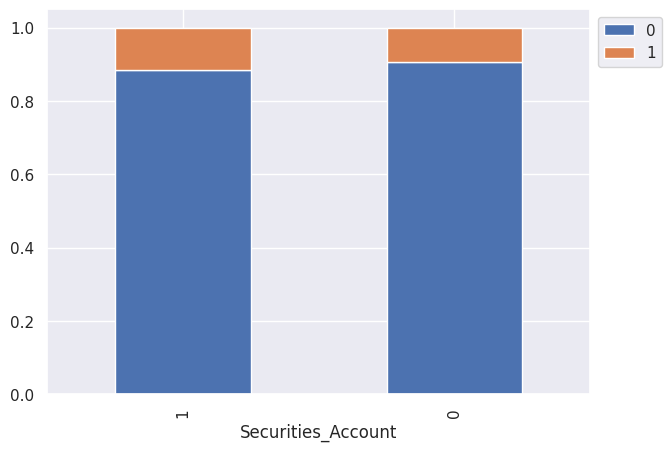

In [ ]:
stacked_barplot(data, 'Securities_Account', 'Personal_Loan')

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


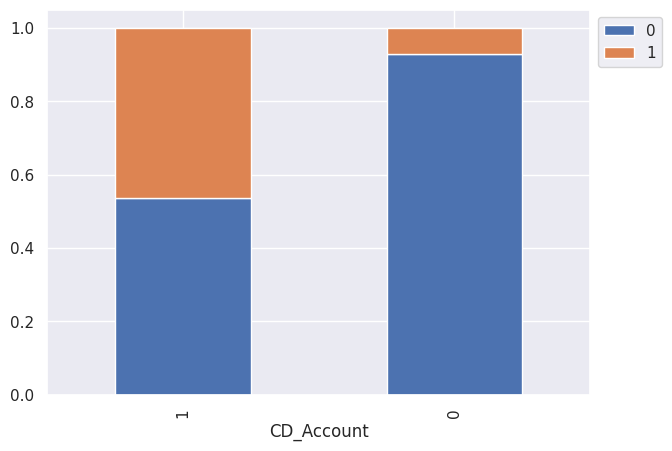

In [ ]:
stacked_barplot(data, 'CD_Account', 'Personal_Loan')

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


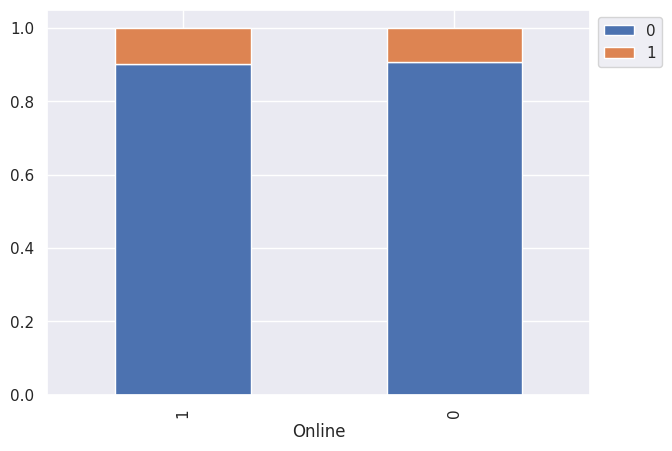

In [ ]:
stacked_barplot(data, 'Online', 'Personal_Loan')

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


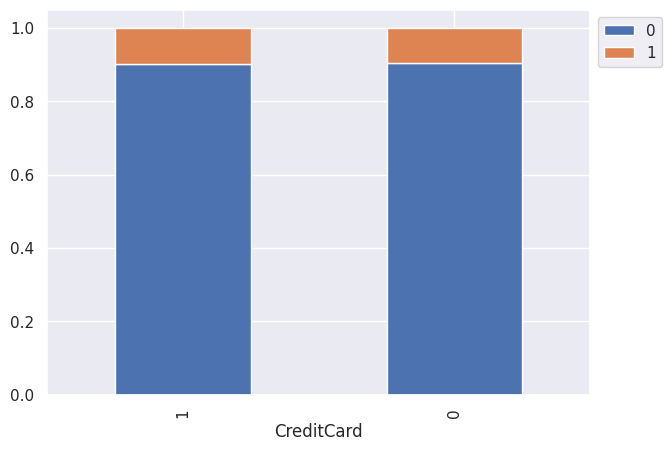

In [ ]:
stacked_barplot(data, 'CreditCard', 'Personal_Loan')

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


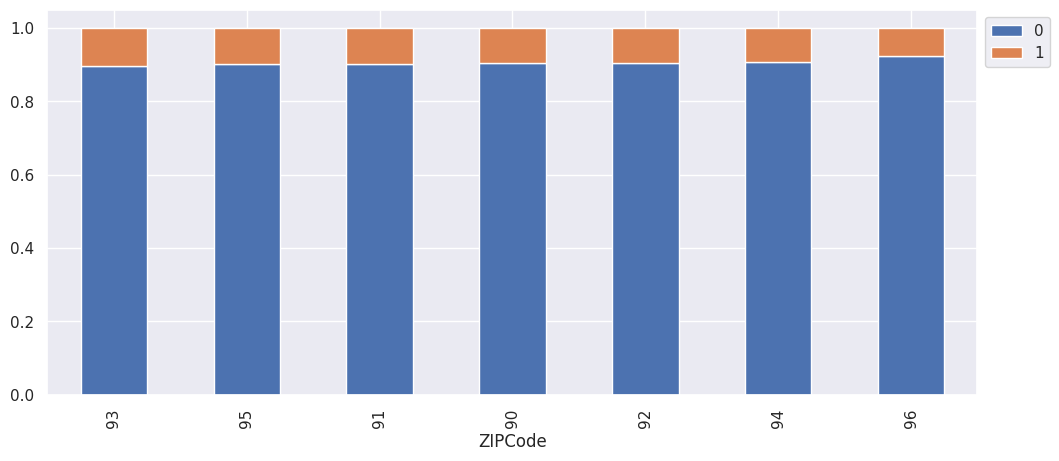

In [ ]:
stacked_barplot(data, 'ZIPCode', 'Personal_Loan')

#Data Processing

In [ ]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)

IQR=Q3-Q1

lower_whisker=Q1-1.5*IQR
upper_whisker=Q3+1.5*IQR


In [ ]:
((data.select_dtypes(include=['float64','int64'])<lower_whisker)
  |(data.select_dtypes(include=['float64','int64'])>upper_whisker)
  ).sum()/len(data)*100

ID           0.000000
Age          0.000000
Experience   0.000000
Income       1.920000
Family       0.000000
CCAvg        6.480000
Mortgage     5.820000
dtype: float64

## Model Building

### Model Evaluation Criterion

In [ ]:
X=data.drop(['Personal_Loan','Experience'],axis=1)
y=data['Personal_Loan'].astype('int64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   category
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   category
 10  Securities_Account  5000 non-null   category
 11  CD_Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 308.8 KB


In [ ]:
X= pd.get_dummies(X, columns=['ZIPCode','Education'],drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
print(X_train.shape, X_test.shape)

(3500, 18) (1500, 18)


In [ ]:
print('Shape of Training set: ',X_train.shape[0])
print('Shape of test set:',X_test.shape[0])
print('Percentage of classes in training set:')
print(y_train.value_counts(normalize=True))
print('Percentage of classes in test set:')
print(y_test.value_counts(normalize=True))

Shape of Training set:  3500
Shape of test set: 1500
Percentage of classes in training set:
0   0.905429
1   0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0   0.900667
1   0.099333
Name: Personal_Loan, dtype: float64


- This result of high negative score and low positive score its because of the data revealing most negative data
  - but could be improved by training

### Model Building

In [ ]:
def model_performance_classification_sklearn(model, predictors, target):
  """
  Function to compute dirrerent metrics to ckeck classification model performance

  model: classifier
  predictors: independent variables
  target: dependent variable
  """
#pred to prediction
  pred=model.predict(predictors)

  acc=accuracy_score(target, pred)
  recall=recall_score(target, pred)
  precision= precision_score(target, pred)
  f1=f1_score(target, pred)

  df_perf=pd.DataFrame(
      {'Accuracy':acc, 'Recall':recall, 'Precision': precision, 'F1':f1,},
      index=[0],
  )
  return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
  """
  To plot the confusion_matrix with percentages

  model: classifier
  predictors: independent variables
  target: dependent variable
  """
  y_pred= model.predict(predictors)
  cm= confusion_matrix(target, y_pred)
  labels= np.asarray(
      [
          ['{0:0.0f}'.format(item) + '\n{0:.2%}'.format(item/ cm.flatten().sum*())]
          for item in cm.flatten()
      ]
  ).reshape(2,2)

  plt.figure(figsize=(6,4))
  sns.heatmap(cm,annot=labels,fmt='')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [ ]:
#gini: how pure detection
#class weight added based on the above results of uneven positive(more emphasis when training data) and negative
#random state: ensuring each time the result is the same
model=DecisionTreeClassifier(criterion='gini', class_weight={0:0.1,1:0.9},random_state=1)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=1)

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

TypeError: ignored

In [ ]:
decision_tree_perf_train=model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.000000,1.000000,1.000000,1.000000


In [ ]:
feature_names=list(X_train.columns)
print(feature_names)

['ID', 'Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_Professional', 'Education_Undergraduate']


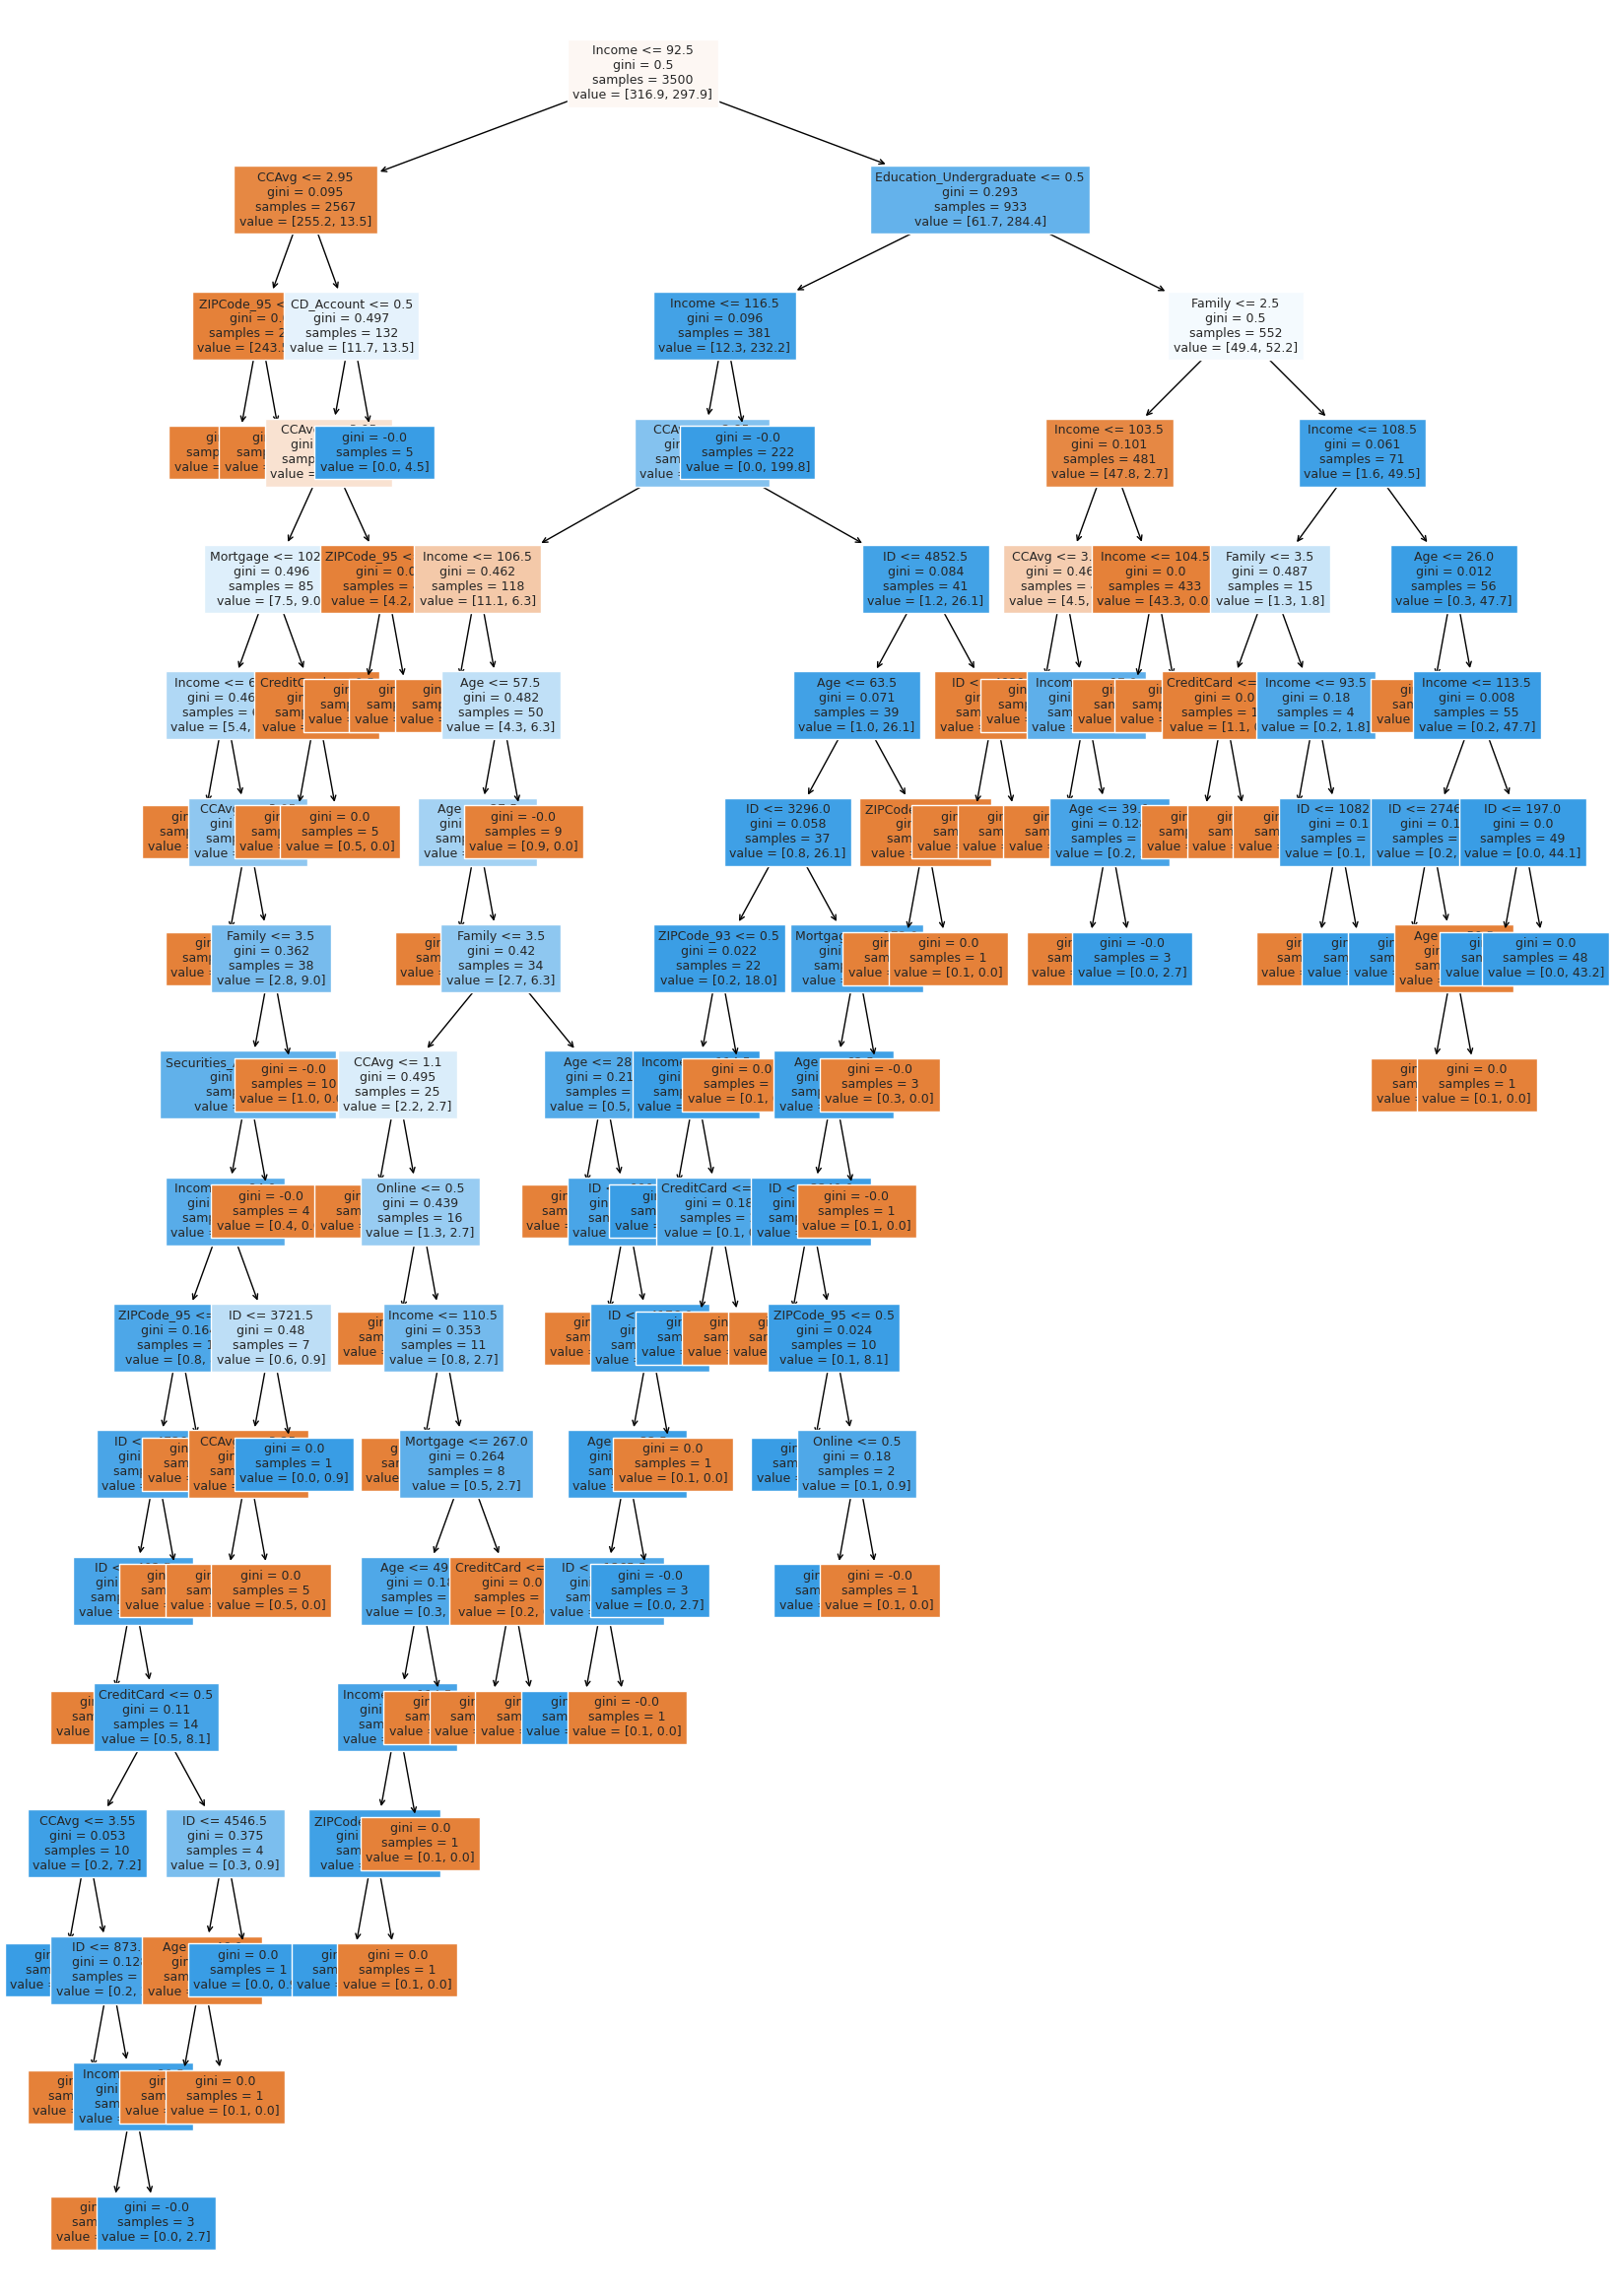

In [ ]:
plt.figure(figsize=(20,30))
out=tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow=o.arrow_patch
    if arrow is not None:
      arrow.set_edgecolor('black')
      arrow.set_linewidth(1)
plt.show()

In [ ]:
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- ZIPCode_95 <= 0.50
|   |   |   |--- weights: [202.20, 0.00] class: 0
|   |   |--- ZIPCode_95 >  0.50
|   |   |   |--- weights: [41.30, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- Income <= 68.50
|   |   |   |   |   |   |--- weights: [1.50, 0.00] class: 0
|   |   |   |   |   |--- Income >  68.50
|   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |--- weights: [1.10, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |   |   |   |--- Income <= 84.00
|   |   |   |   |   |   |   |   |   |   |--- ZIPCode_95 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- ZIPCode_95 >  0.50
|

In [ ]:
print(
    pd.DataFrame(
        model.feature_importances_, columns=['Imp'],index=X_train.columns
    ).sort_values(by='Imp',ascending=False)
)

                             Imp
Income                  0.632511
Family                  0.147990
Education_Undergraduate 0.088820
CCAvg                   0.087873
ID                      0.011086
Age                     0.009671
CD_Account              0.007690
Mortgage                0.007405
Online                  0.002282
Securities_Account      0.001879
CreditCard              0.000920
ZIPCode_93              0.000641
ZIPCode_91              0.000628
ZIPCode_95              0.000603
ZIPCode_94              0.000000
ZIPCode_92              0.000000
ZIPCode_96              0.000000
Education_Professional  0.000000


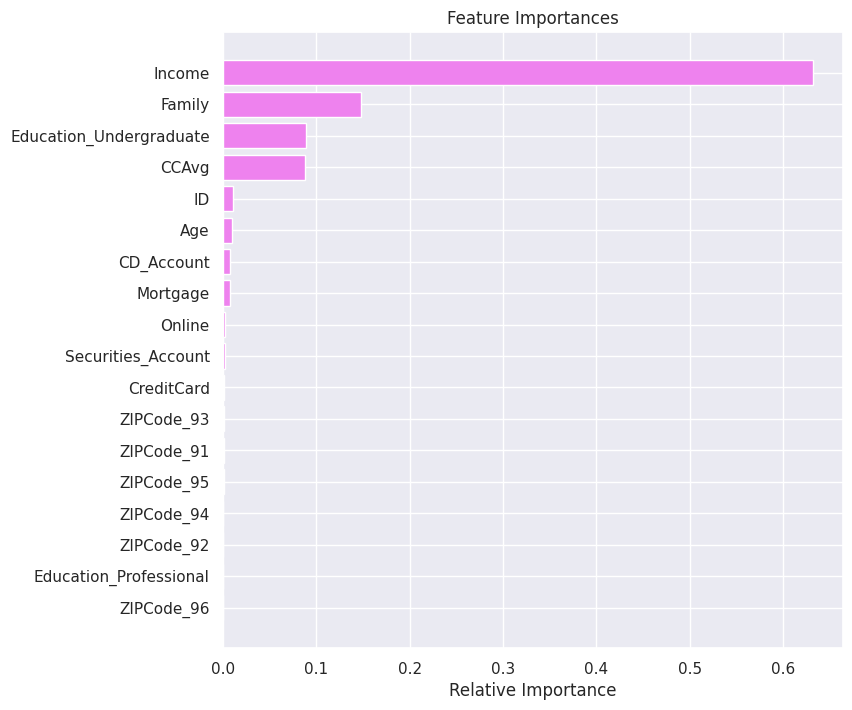

In [ ]:
importances=model.feature_importances_
indices=np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet',align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
confusion_matrix_sklearn(model,X_test, y_test)

TypeError: ignored

In [ ]:
decision_tree_perf_test= model_performance_classification_sklearn(model,X_test, y_test)
decision_tree_perf_test

### Model Performance Improvement

In [ ]:
estimator=DecisionTreeClassifier(random_state=1, class_weight={0:0.1,1:0.9})

parameters={
    'max_depth': np.arange(6,15),
    'criterion':['entropy','gini'],
    'splitter':['best','random'],
    'min_samples_leaf':[1,2,5,7,10],
    'max_leaf_nodes':[2,3,5,10],
}

acc_scorer=make_scorer(recall_score)

#CV=5: running 5 time, and average the result, more accurate
grid_obj=GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj=grid_obj.fit(X_train, y_train)

#estimator: the best model
estimator=grid_obj.best_estimator_

estimator.fit(X_train,y_train)

In [ ]:
confusion_matrix_sklearn(estimator,X_train,y_train)
confusion_matrix_sklearn

TypeError: ignored

In [ ]:
decision_tree_tune_perf_train=model_performance_classification_sklearn(estimator,X_train, y_train)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.642286,0.996979,0.208729,0.345188


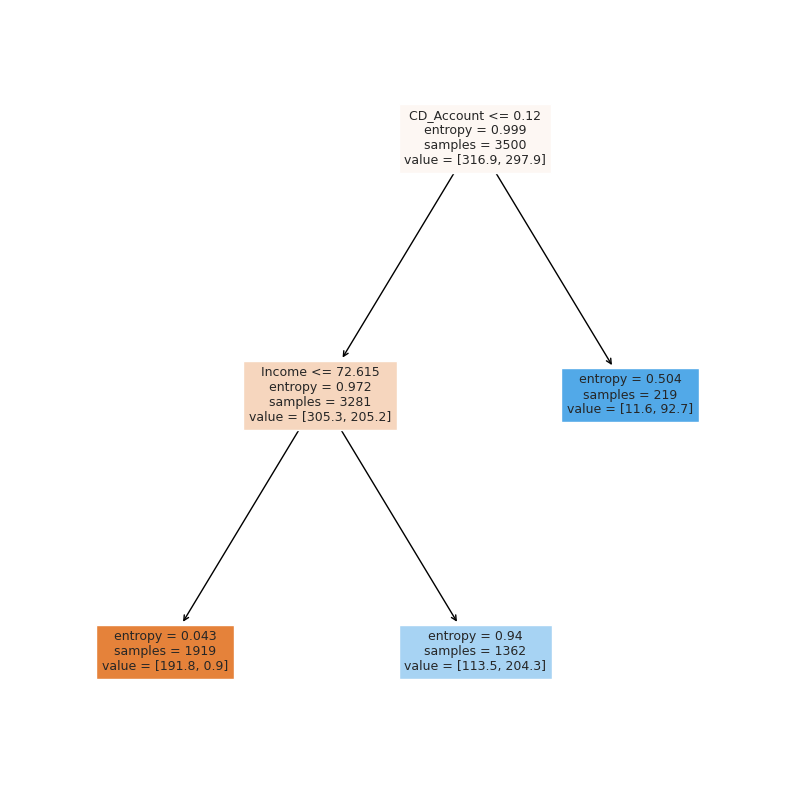

In [ ]:
#visualize
plt.figure(figsize=(10,10))
out=tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
  arrow=o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('black')
    arrow.set_linewidth(1)
plt.show()

In [ ]:
print(
    pd.DataFrame(
        estimator.feature_importances_, columns=['Imp'], index=X_train.columns
    ).sort_values(by='Imp',ascending=False)
)

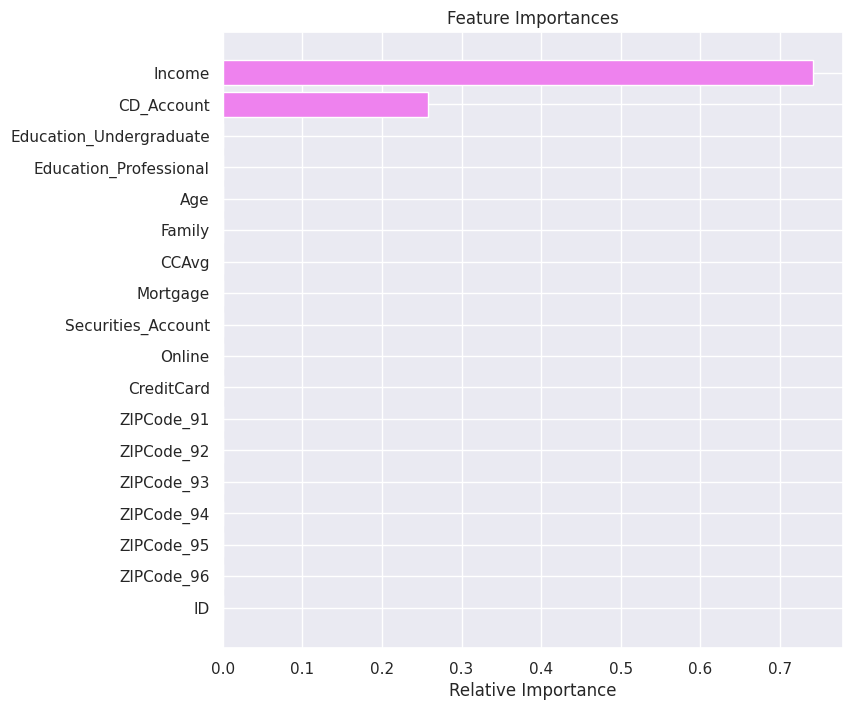

In [ ]:
importances=estimator.feature_importances_
indices=np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='violet',align='center')
plt.yticks(range(len(indices)),[feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
#check performance on test data
confusion_matrix_sklearn(estimator,X_test, y_test)

TypeError: ignored

In [ ]:
decision_tree_tune_perf_test=model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.630667,0.979866,0.209469,0.345154


In [ ]:
#cost complexity pruning
clf= DecisionTreeClassifier(random_state=1, class_weight={0:0.1,1:0.9})
#path: the path for this pruning
path=clf.cost_complexity_pruning_path(X_train, y_train)
#impurity: how good to seperate the leaf
ccp_alphas, impurities = path.ccp_alphas, path.impurities


In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,-0.000000
1,0.000000,-0.000000
2,0.000000,-0.000000
3,0.000000,-0.000000
4,0.000000,-0.000000
5,0.000000,-0.000000
6,0.000000,-0.000000
7,0.000000,-0.000000
8,0.000000,-0.000000
9,0.000000,-0.000000


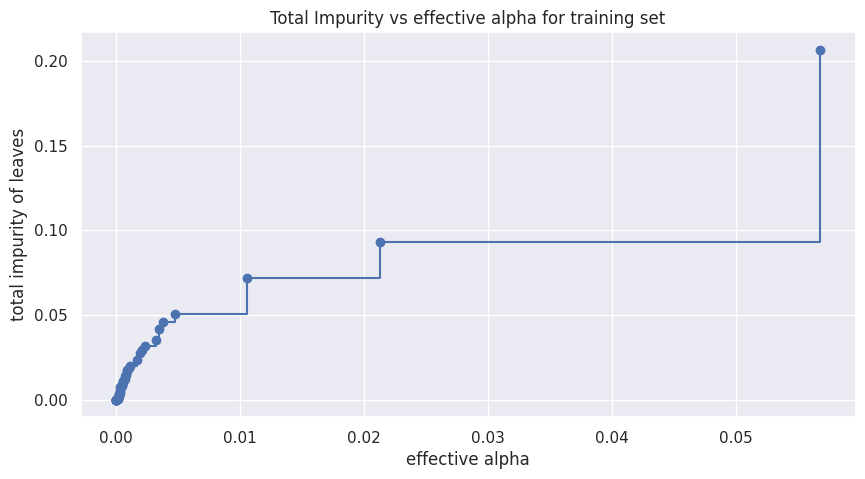

In [ ]:
#visualizing how ccp and alpha impact
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle='steps-post')
ax.set_xlabel('effective alpha')
ax.set_ylabel('total impurity of leaves')
ax.set_title('Total Impurity vs effective alpha for training set')
plt.show()

- the higher the number of ccp_alpha = cutting more nodes from the tree
  - goal: to find the sweet spot (more than one node)
  - how: next step

In [ ]:
#training the decsion tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, clf[-1], with one node.
clfs=[]
for ccp_alpha in ccp_alphas:
  clf=DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight={0:0.1,1:0.9})
  clf.fit(X_train, y_train)
  clfs.append(clf)
print(
    'Number of nodes in the last tree is: {} with ccp_alpha:{}'.format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha:0.29287854019800325


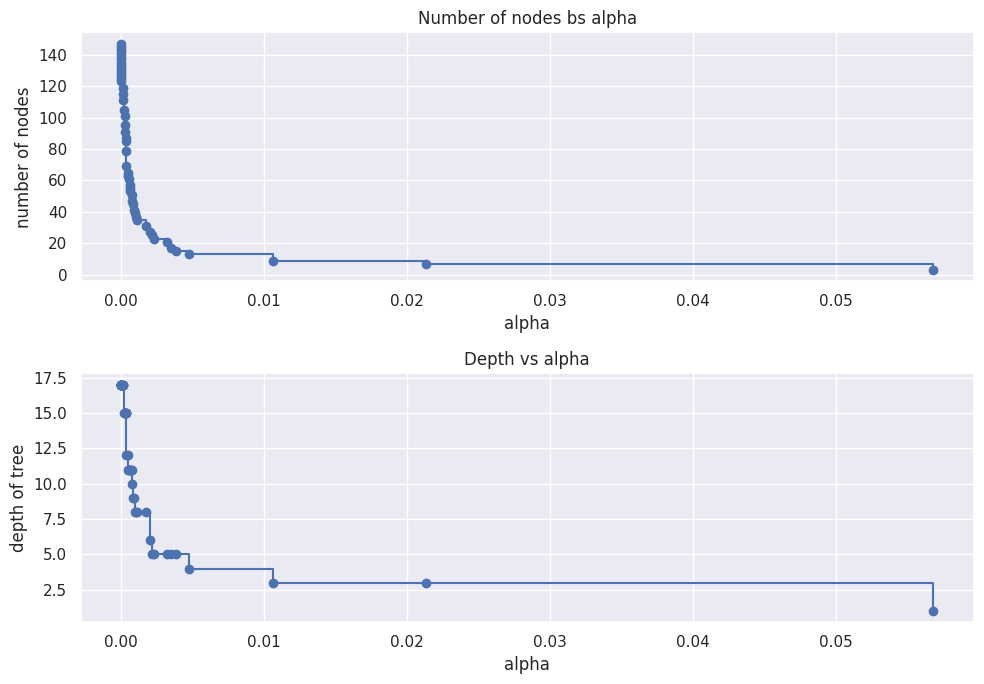

In [ ]:
#visualize for ccp, using the classifier except the last one [:-1]
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('number of nodes')
ax[0].set_title('Number of nodes bs alpha')
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle='steps-post')
ax[1].set_xlabel('alpha')
ax[1].set_ylabel('depth of tree')
ax[1].set_title('Depth vs alpha')
fig.tight_layout()

In [ ]:
#recall vs. alpha for training and testing sets, to compare and determine there is a overfitting (train and test huge gap)
recall_train=[]
for clf in clfs:
  pred_train=clf.predict(X_train)
  values_train=recall_score(y_train, pred_train)
  recall_train.append(values_train)

recall_test=[]
for clf in clfs:
  pred_test= clf.predict(X_test)
  values_test=recall_score(y_test, pred_test)
  recall_test.append(values_test)

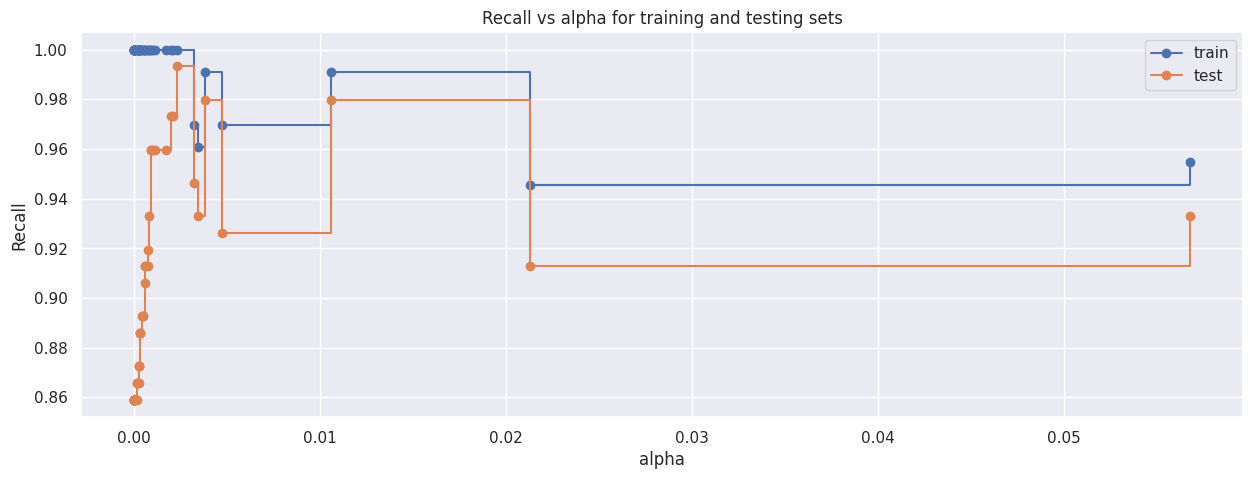

In [ ]:
##visualizing the above score for train and test
fig, ax=plt.subplots(figsize=(15,5))
ax.set_xlabel('alpha')
ax.set_ylabel('Recall')
ax.set_title('Recall vs alpha for training and testing sets')
ax.plot(ccp_alphas, recall_train, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, recall_test, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

- after pruning, alpha is increased.
- lower than 0.005 gives the best score for train and test scores.
- the lines of train and test are closed, meaning lowe possibility of overfitting

In [ ]:
#creating the model where we get highest train and test recall
index_best_model=np.argmax(recall_test)
best_model=clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00232891701662016,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)


In [ ]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.00232891701662016,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)

In [ ]:
#post pruning
estimator_2=DecisionTreeClassifier(
    ccp_alpha=0.002,class_weight={0:0.1,1:0.9}, random_state=1
)
estimator_2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.1, 1: 0.9},
                       random_state=1)

In [ ]:
#performance on training set
confusion_matrix_sklearn(estimator_2, X_train, y_train)

TypeError: ignored

In [ ]:
decision_tree_tune_post_train=model_performance_classification_sklearn(estimator_2,X_train,y_train)
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,0.967143,1.000000,0.742152,0.851995


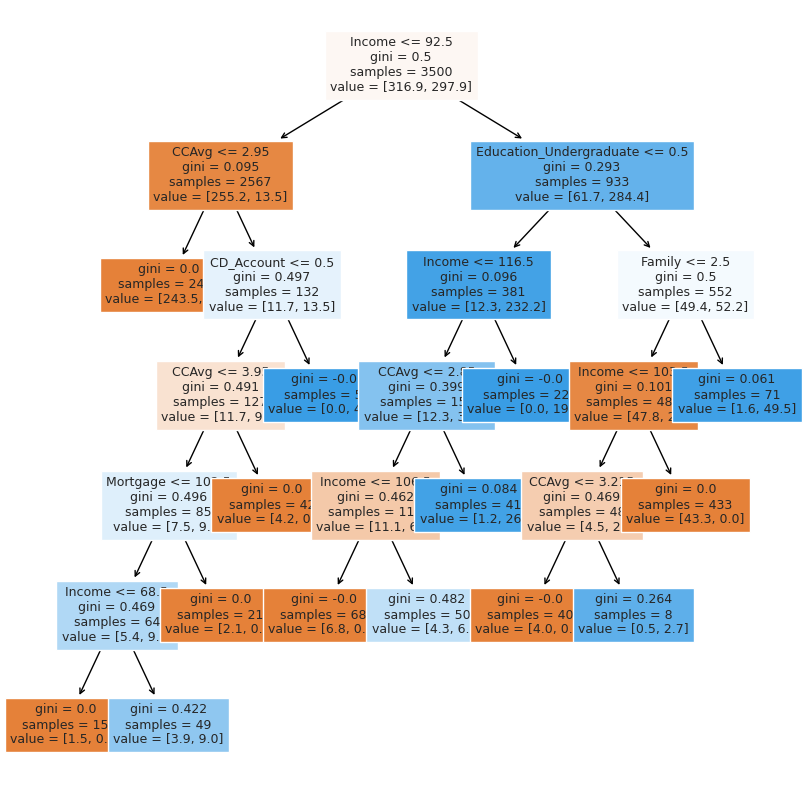

In [ ]:
#visualizing Decision Tree
plt.figure(figsize=(10,10))
out=tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

for o in out:
  arrow=o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('black')
    arrow.set_linewidth(1)
plt.show()

In [ ]:
print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [243.50, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- Income <= 68.50
|   |   |   |   |   |   |--- weights: [1.50, 0.00] class: 0
|   |   |   |   |   |--- Income >  68.50
|   |   |   |   |   |   |--- weights: [3.90, 9.00] class: 1
|   |   |   |   |--- Mortgage >  102.50
|   |   |   |   |   |--- weights: [2.10, 0.00] class: 0
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [4.20, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 4.50] class: 1
|--- Income >  92.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 2.85
|   |   |   |   |--- Income <= 106.50
|   |   |   |   |   |--- weights: [6.80, 0.00] class: 0
|   |   |   |   |--- Income >  106.50
|   |   |   |   |   |--- weights: [4.30, 6.30] class: 1
|   |   |   

In [ ]:
print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=['Imp'], index=X_train.columns
    ).sort_values(by='Imp',ascending=False)
)

                             Imp
Income                  0.659850
Family                  0.146566
Education_Undergraduate 0.093958
CCAvg                   0.086559
CD_Account              0.008135
Mortgage                0.004932
ZIPCode_93              0.000000
Education_Professional  0.000000
ZIPCode_96              0.000000
ZIPCode_95              0.000000
ZIPCode_94              0.000000
ID                      0.000000
ZIPCode_92              0.000000
ZIPCode_91              0.000000
Age                     0.000000
Online                  0.000000
Securities_Account      0.000000
CreditCard              0.000000


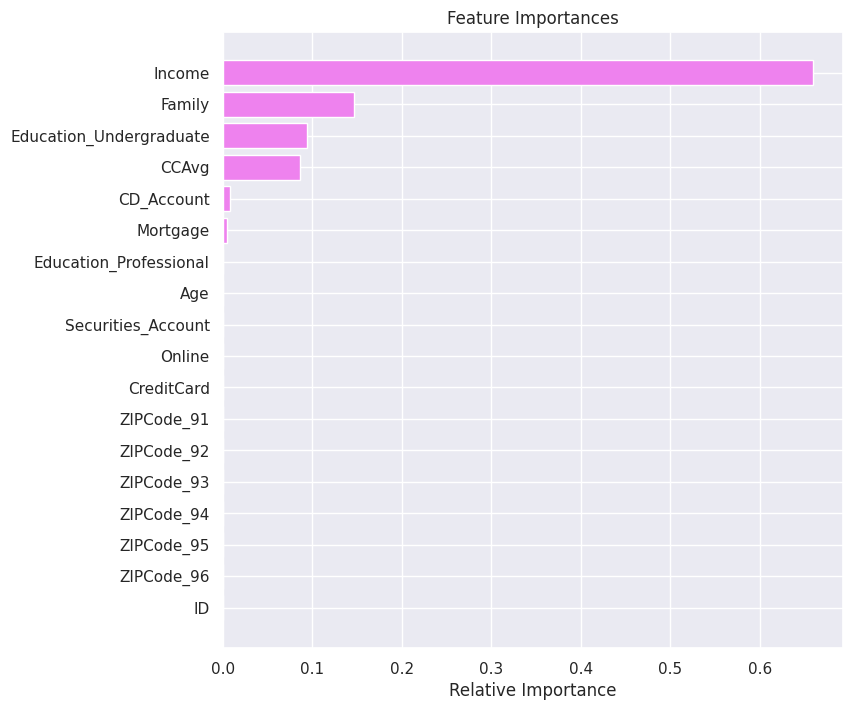

In [ ]:
importances=estimator_2.feature_importances_
indices=np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
#checking performance on test data
confusion_matrix_sklearn(estimator_2, X_test, y_test)

TypeError: ignored

In [ ]:
decision_tree_tune_post_test=model_performance_classification_sklearn(estimator_2,X_test,y_test)
decision_tree_tune_post_test

,Accuracy,Recall,Precision,F1
0,0.957333,0.973154,0.707317,0.819209


## Model Comparison and Final Model Selection

In [ ]:
models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T,decision_tree_tune_post_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)","Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.000000,0.642286,0.967143
Recall,1.000000,0.996979,1.000000
Precision,1.000000,0.208729,0.742152
F1,1.000000,0.345188,0.851995


In [ ]:
models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T,decision_tree_tune_post_test.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)","Decision Tree (Post-Pruning)"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.977333,0.630667,0.957333
Recall,0.859060,0.979866,0.973154
Precision,0.907801,0.209469,0.707317
F1,0.882759,0.345154,0.819209


## Actionable Insights and Business Recommendations


**What recommedations would I suggest to the bank?**

- Potential customers with less or equal to income $ 116,500 are more likely to purchase the personal loan

- While education also poses impact on the result, people that are with Undergraduate education level but an income more than $ 116,500 are more likely to pose a positive impact on the product purchase

- With an educational background of bachelor and an income less tha $ 116,500, and a average credit card of less than 2.5 will be more interested in getting the personal loan

- people with income lower than $ 92,500 and average credit card of apporximately less than 3, are more intended to purchase the personal loan

- If they have more than ~3 credit card and own a Certificate Depostite account, they are more likely to to interested in the personal loan product

- With a Mortgage of less than $ 172,000, are more likely to purchase the product

- If potential customers have higher income of $ 92,500 and are an education backgorund of non-undergraduate, family members less than 2-3 people, they are more likely to purchase personal loans

- Geographic locations, age, and other education backgrounds have little impact on their purchase
- Whether owning securities account or the number of credit card poses no impact on the the purchase of personal loans
